# Car Brand Prediction with Transfer Learning
I used the Keras API,Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

Using TensorFlow backend.


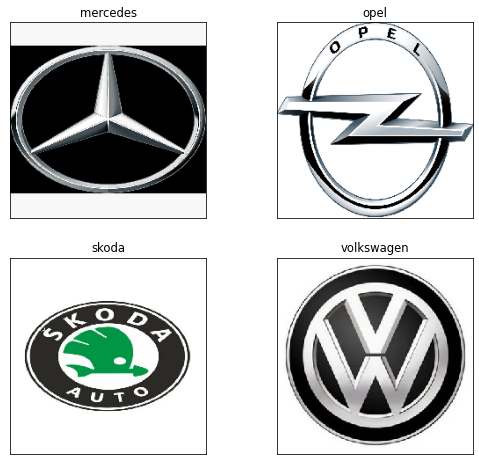

In [2]:
from matplotlib.pyplot import figure

mercedes_logo = load_img('./data/logo/mercedes.jpg', target_size = [224,224])
opel_logo = load_img('./data/logo/opel.jpg', target_size = [224,224])
skoda_logo = load_img('./data/logo/skoda.jpg', target_size = [224,224])
volkswagen_logo = load_img('./data/logo/volkswagen.jpg', target_size = [224,224])


titles = ["mercedes","opel","skoda","volkswagen"]
images = [mercedes_logo,opel_logo,skoda_logo,volkswagen_logo ]

figure(figsize=(9,8), dpi=70)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
# resize all images to this
img_size = [224, 224]

train_path = './data/Train'
validation_path = './data/Test'

In [4]:
# geting the labels list from sub folders
folders  = glob(train_path + '/*')
print(folders)

['./data/Train\\mercedes', './data/Train\\opel', './data/Train\\skoda', './data/Train\\volkswagen']


In [5]:
# initiate ResNet50 model with imagenet weights

resnet = ResNet50(input_shape = img_size + [3],
                  weights = 'imagenet',
                  include_top = False)

In [6]:
# freeze the existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# define the output layer
flatten_layer = tf.keras.layers.Flatten()(resnet.output)
dense_layer = tf.keras.layers.Dense(256, activation = 'relu')(flatten_layer)
output_layer = tf.keras.layers.Dense(3, activation = 'softmax')(dense_layer)

In [8]:
# create the model object
model = tf.keras.Model(inputs = resnet.input, outputs = output_layer)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [15]:
# data augmentation
train_datagen = ImageDataGenerator( rescale = 1./ 255.,
                                    rotation_range = 30,
                                    shear_range = 0.95,
                                    zoom_range = 0.95,
                                    horizontal_flip = True)

validation_datagen = ImageDataGenerator( rescale = 1./255. )

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size =32,
                                                    target_size = img_size,
                                                    class_mode = 'categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(validation_path,
                                                              batch_size = 32,
                                                              target_size = img_size,
                                                              class_mode = 'categorical',
                                                              shuffle=True)

Found 1287 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [19]:
# fit the model
history = model.fit_generator(train_generator,
                              validation_data = validation_generator,
                              steps_per_epoch = len(train_generator),
                              validation_steps = len(validation_generator),
                              epochs = 50)

Epoch 1/50


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[32,3] labels_size=[32,4]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits
 (defined at c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py:4889)
]] [Op:__inference_train_function_8626]

Errors may have originated from an input operation.
Input Source operations connected to node categorical_crossentropy/softmax_cross_entropy_with_logits:
In[0] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape:	
In[1] categorical_crossentropy/softmax_cross_entropy_with_logits/Reshape_1:

Operation defined at: (most recent call last)
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
>>>     app.start()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
>>>     self.io_loop.start()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
>>>     await result
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
>>>     res = shell.run_cell(
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 2885, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3139, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3318, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\win\AppData\Local\Temp\ipykernel_2740\2645795381.py", line 2, in <module>
>>>     history = model.fit_generator(train_generator,
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1966, in fit_generator
>>>     return self.fit(
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1189, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 859, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 849, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 842, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\training.py", line 800, in train_step
>>>     loss = self.compiled_loss(
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py", line 204, in __call__
>>>     loss_value = loss_obj(y_t, y_p, sample_weight=sw)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py", line 155, in __call__
>>>     losses = call_fn(y_true, y_pred)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py", line 259, in call
>>>     return ag_fn(y_true, y_pred, **self._fn_kwargs)
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\losses.py", line 1679, in categorical_crossentropy
>>>     return backend.categorical_crossentropy(
>>> 
>>>   File "c:\users\win\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\backend.py", line 4889, in categorical_crossentropy
>>>     return nn.softmax_cross_entropy_with_logits_v2(
>>> 

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()


#plot the accuracy
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'validation acc')
plt.legend()
plt.show()


In [ ]:
model.save_weights('./model/carbrand_cnn.h5')
print('Saved model to disk!')

# load the model

#model.load_weights('./model/carbrand_cnn.h5')
#print('Loaded model from disk!')

In [ ]:
# predicting the test set
y_pred = model.predict(validation_generator)

y_pred = np.argmax(y_pred, axis = 1)
y_pred

In [ ]:
# load and use the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from glob import glob

In [ ]:
#glob() File wildcards
folders = glob('./data/Train/*')
print(folders)
labels = []

for path in folders:
    l = path.split('/')
    print(l)
    label = l[-1].upper()
    labels.append(label)
labels.sort()
print(labels)

In [ ]:
def Predict_Brand(image_path, image_size = [224, 224], labels = labels, model = model):
    img = load_img(image_path, target_size = image_size)
    x = image.img_to_array(img).astype(float)
    x = x / 255.
    x = np.expand_dims(x, axis = 0)
    result = model.predict(x)
    result = np.argmax(result, axis = 1)
    return labels[result[0]]

result = Predict_Brand('./data/Test/volkswagen/images60.jpg')
img = load_img('./data/Test/volkswagen/images60.jpg', target_size = [224,224])
plt.imshow(img)
print(result)

In [ ]:
result = Predict_Brand('./data/Test/mercedes/mrc21.jpg')
img = load_img('./data/Test/mercedes/mrc21.jpg', target_size = [224,224])
plt.imshow(img)
print(result)